In [36]:
import display
import hopfield_net
import read_csv

In [37]:
CONST_ACTIVATION_FUNCTIONS = ['signum', 'heavy_side']
CONST_DYNAMICS_TYPE = ['asynchronous', 'synchronous']

In [38]:
datasets = ["animals-14x9.csv",
                "large-25x25.csv",
                "large-25x50.csv",
                "letters-14x20.csv",
                "letters-abc-8x12.csv",
                "OCRA-12x30-cut.csv",
                "small-7x7.csv"]

In [47]:
train, dims = read_csv.read_patterns('./../data/hopfield/' + datasets[1])
num_of_patterns = train.shape[0]

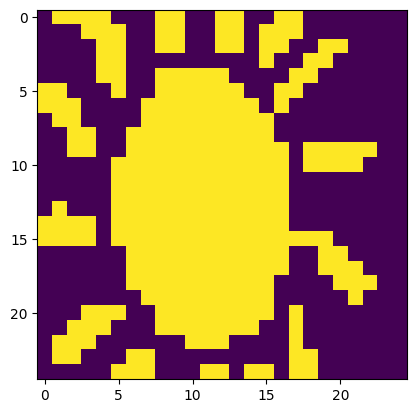

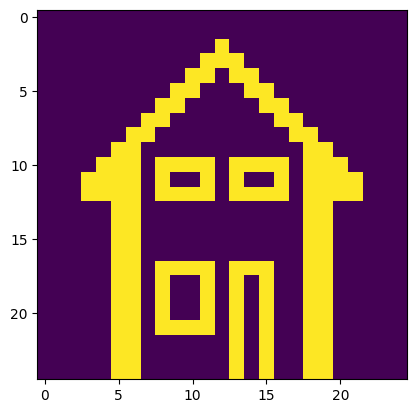

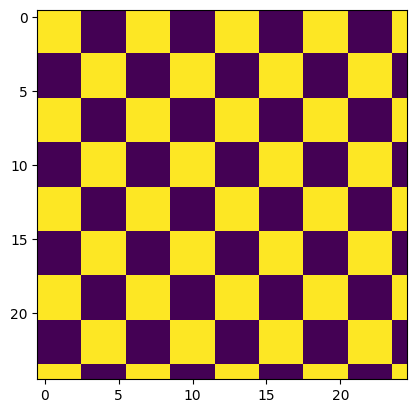

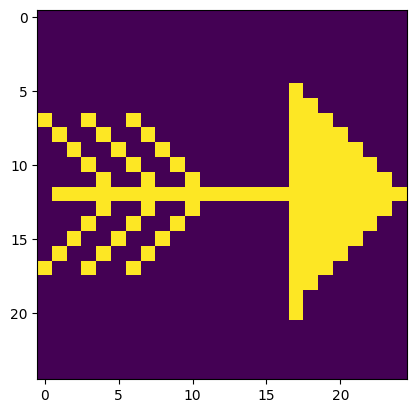

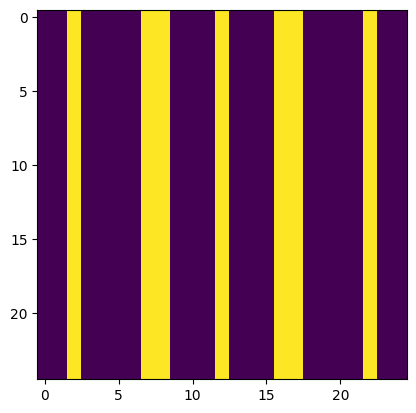

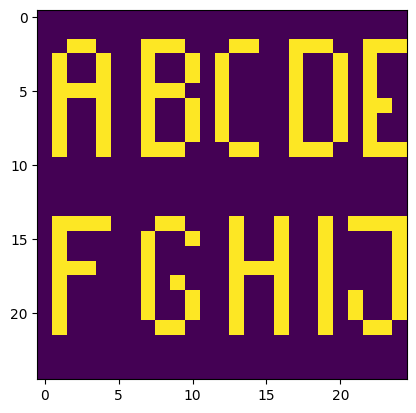

In [48]:
# save training data as .png
for i in range(num_of_patterns):
    display.save_img(train[i], dims, "./../data/hopfield/train/p" + str(i+1) + ".png")

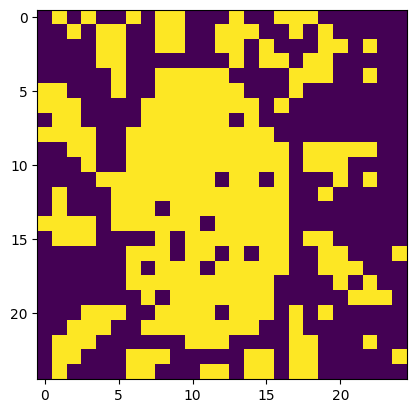

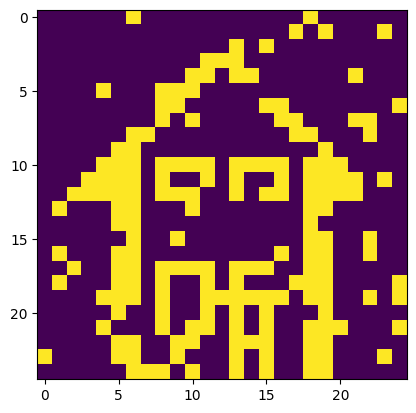

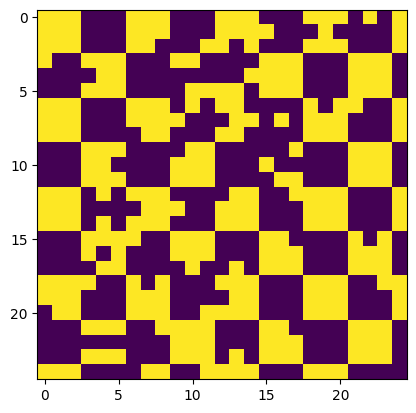

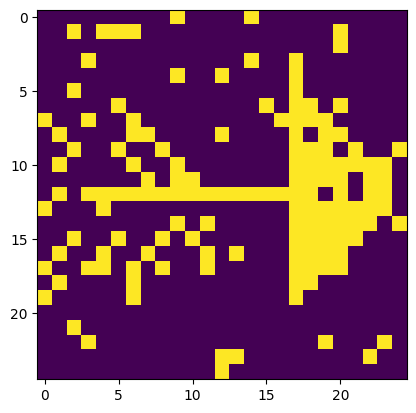

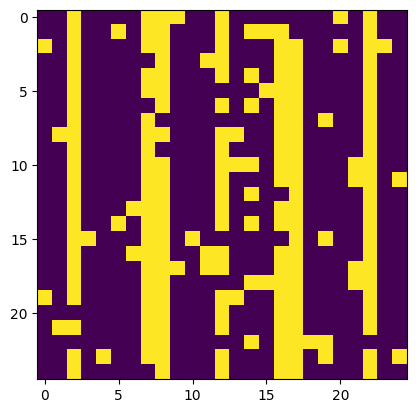

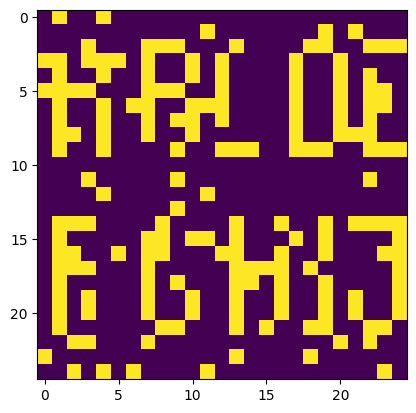

In [49]:
X = []
for i in range(num_of_patterns):
    X.append(read_csv.noise(train[i], 0.1))
    display.save_img(X[-1], dims, "./../data/hopfield/noise/n" + str(i+1) + ".png")

In [50]:
n = dims[0] * dims[1]
# activation function 0 - signum, 1 - heaviside
activation = 0
# dynamics type 0 - asynchronous, 1 - synchronous
dynamics = 0

In [51]:
HN = hopfield_net.HopfieldNet(
        n = n,
        activation = CONST_ACTIVATION_FUNCTIONS[activation],
        dynamics = CONST_DYNAMICS_TYPE[dynamics]
    )

In [52]:
HN.HEBB_training(train)
for i in range(num_of_patterns):
    last_x = HN.forward(dims, init_x = X[i], epochs = 200, animation = False)
    # display.save_img(last_x, dims, "./../data/hopfield/hebb/h" + str(i+1) + ".png")

In [53]:
HN2 = hopfield_net.HopfieldNet(
    n = n,
    activation = CONST_ACTIVATION_FUNCTIONS[activation],
    dynamics = CONST_DYNAMICS_TYPE[dynamics]
)


6
Oja epoch # 1
row:  [0.6666667  0.33333334 0.         0.6666667  0.6666667  0.        ]


c:\Users\felip\Desktop\python\NeuralNetwork\hopfield\hopfield_net.py:63: RuntimeWarning: overflow encountered in add
  Dv += V[:,s] * (X[:,s] - self.W[i] * V[:,s])
c:\Users\felip\Desktop\python\NeuralNetwork\hopfield\hopfield_net.py:63: RuntimeWarning: invalid value encountered in multiply
  Dv += V[:,s] * (X[:,s] - self.W[i] * V[:,s])


Oja epoch # 2
row:  [-5.020327   -1.5886844  -0.00799947 -2.9621382  -3.038591    0.        ]


c:\Users\felip\Desktop\python\NeuralNetwork\hopfield\hopfield_net.py:52: RuntimeWarning: invalid value encountered in matmul
  V=np.matmul(self.W, X)      #w_{ij} ksi_j


Oja epoch # 3
row:  [nan nan nan nan nan  0.]
Oja epoch # 4
row:  [nan nan nan nan nan  0.]
Oja epoch # 5
row:  [nan nan nan nan nan  0.]
Oja epoch # 6
row:  [nan nan nan nan nan  0.]
Oja epoch # 7
row:  [nan nan nan nan nan  0.]
Oja epoch # 8
row:  [nan nan nan nan nan  0.]
Oja epoch # 9
row:  [nan nan nan nan nan  0.]
Oja epoch # 10
row:  [nan nan nan nan nan  0.]


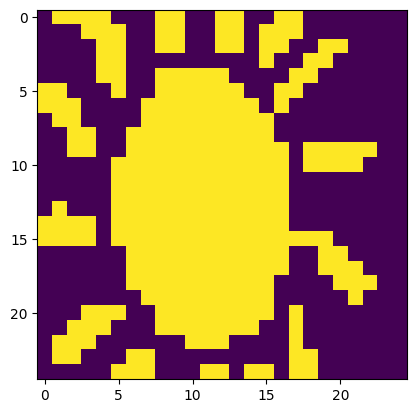

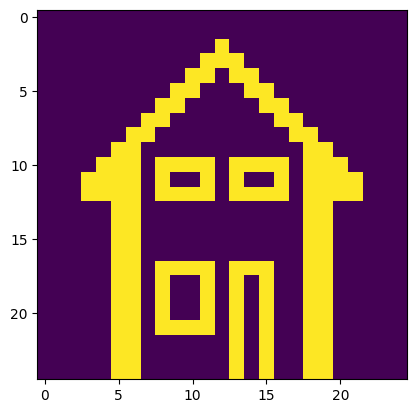

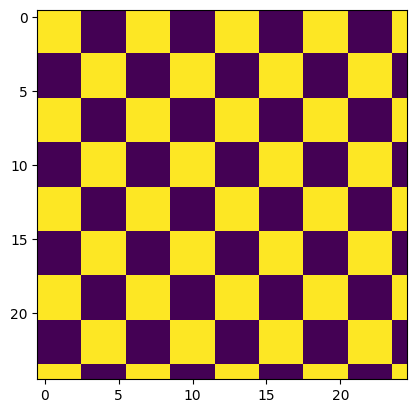

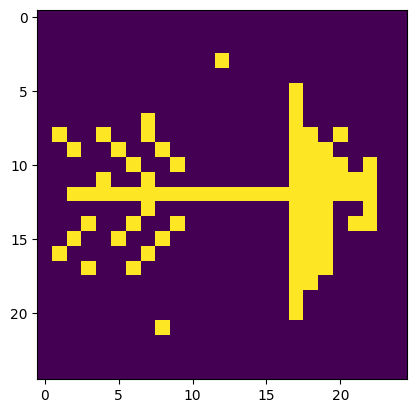

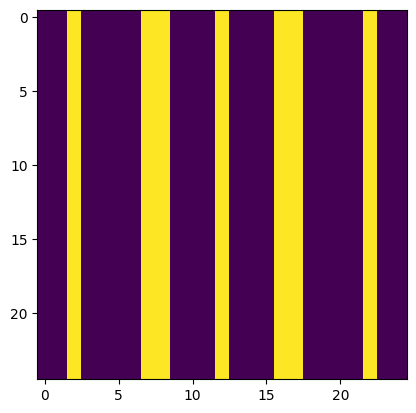

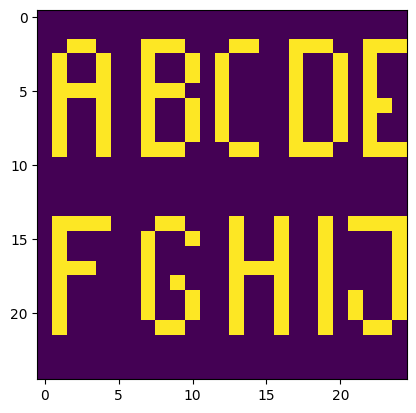

In [54]:
HN2.OJA_training(train, 10)
for i in range(num_of_patterns):
    #wait = input()
    last_x = HN.forward(dims, init_x = X[i], epochs = 100, animation = False)
    display.save_img(last_x, dims, "./../data/hopfield/oja/o" + str(i+1) + ".png")
    #wait = input()
    #last_x = HN.forward(dims, init_x = last_x, epochs = 10, animation = False)
    #display.save_img(last_x, dims, "../test/oja/o" + str(i+1) + ".png")